<a href="https://colab.research.google.com/github/philip-hawkins-git/philiphawkinsgit/blob/main/SpeechDifference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

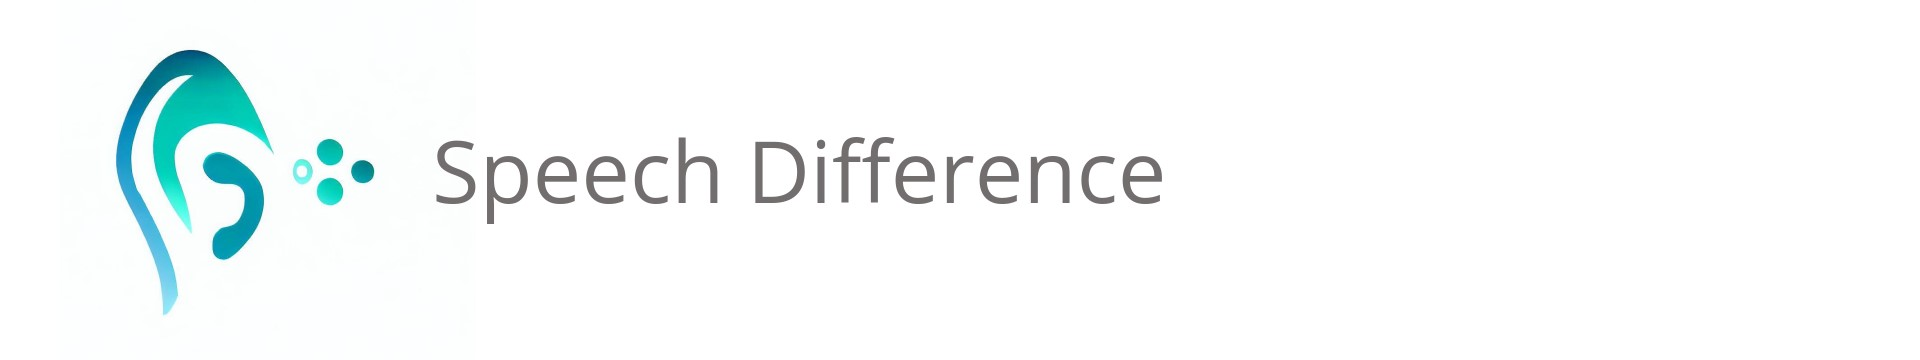

# Transcriptions Compared
Speech Difference is a user-friendly transcription comparison tool that works with a number of media files, including mp3, wav, and wav, and can be used from either a path or a url. .

Here's how it works:
1.   Speech Difference compares the two inputs and creates a transcript similarity score as a percentage.
2.   If the similarity score is less than 100%, Speech Difference displays the overlap in black font and the differences in green and red font.

Simply hit the run button below to try it out!

In [8]:
Input_1 = "/content/BEES3324000H_ENT_MEZZ_HULU.mp4" #@param {type:"string"}
Input_2 = "/content/AIDP7385000H_ENT_MEZZ_HULU-Scene-001.mp4" #@param {type:"string"}

try:
    import Levenshtein
except ModuleNotFoundError:
    !pip install Levenshtein
    import Levenshtein
try:
    import whisper
except ModuleNotFoundError:
    !pip install git+https://github.com/openai/whisper.git
    !pip install jiwer
    import whisper
import difflib
import string

def preprocess_text(text):
    # Convert to uppercase
    text = text.upper()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    return text

# Transcribe and preprocess Speech_1
model = whisper.load_model("base")
result = model.transcribe(Input_1, fp16=False)
Transcript_1 = preprocess_text(result["text"])

print("Input 1 Transcript:")
print(Transcript_1)
print("")

# Transcribe and preprocess input 2
model = whisper.load_model("base")
result = model.transcribe(Input_2, fp16=False)
Transcript_2 = preprocess_text(result["text"])

print("Input 2 Transcript:")
print(Transcript_2)
print("")


transcript_distance = Levenshtein.distance(Transcript_1, Transcript_2)
transcript_similarity = (1 - (transcript_distance / max(len(Transcript_1), len(Transcript_2)))) * 100
print(f"Transcript similarity score: {transcript_similarity:.0f}%")
print("")

# Only perform the difflib comparison if transcript_similarity is not 100%
if transcript_similarity < 100:
    print("Highlighted Differences:")
    print("")
    differ = difflib.Differ()
    diff_result = list(differ.compare(Transcript_1.split(), Transcript_2.split()))

    # Generate a side-by-side comparison with differences highlighted
    for line in diff_result:
        if line.startswith('  '):
            print(line)
        elif line.startswith('- '):
            print("\033[91m" + line + "\033[0m")
        elif line.startswith('+ '):
            print("\033[92m" + line + "\033[0m")
else:
    print("Transcripts are identical.")

Input 1 Transcript:
 ITS TIME FOR THE SHOW GO WERE GOING TO THE SHOW GET IT IN SHOW GO GET SAUCY APPLEBEES ALL YOU CAN EAT BONELESS WINGS JUST 1299

Input 2 Transcript:
 BEING A PART OF SOMETHING BIGGER THAN YOURSELF IS IMPORTANT BUT MY MESSAGES THAT TAKING CARE OF YOURSELF IS ALSO IMPORTANT WEVE CREATED A HUMAN PERFORMANCE TEAM WITH THE THIRD INFANTRY REGIMENT THE OLD GUARD WHICH HAS EXPERTS FROM ALL FIVE DOMAINS AND WELLNESS PHYSICAL NUTRITIONAL SLEEP MENTAL AND SPIRITUAL READINESS WERE TACTICAL ATHLETES OUR CRAFT IS THE DEFENSE OF OUR NATION OH THATS NOT THE SCOPE YEAH THERE WE GO ONE MORE PERFECT BEING IN THE ARMY GAVE ME THE POSSIBILITIES TO FOLLOW MY PASSIONS

Transcript similarity score: 18%

Highlighted Differences:

+ BEING
+ A
+ PART
+ OF
+ SOMETHING
+ BIGGER
+ THAN
+ YOURSELF
- ITS
+ IS
- TIME
- FOR
+ IMPORTANT
+ BUT
+ MY
+ MESSAGES
+ THAT
+ TAKING
+ CARE
+ OF
+ YOURSELF
+ IS
+ ALSO
+ IMPORTANT
+ WEVE
+ CREATED
+ A
+ HUMAN
+ PERFORMANCE
+ TEAM
+ WITH
  THE
- SHOW
+ THIRD
+ I